# Brazilian E-Commerce Geospatial Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')


### Geolocation Dataset

In [2]:
df_geo = pd.read_csv('olist_geolocation_dataset.csv',dtype={'geolocation_zip_code_prefix': str})

In [3]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [4]:
df_geo['geolocation_zip_code_prefix_1_digits'] = df_geo['geolocation_zip_code_prefix'].str[0:1]
df_geo['geolocation_zip_code_prefix_2_digits'] = df_geo['geolocation_zip_code_prefix'].str[0:2]
df_geo['geolocation_zip_code_prefix_3_digits'] = df_geo['geolocation_zip_code_prefix'].str[0:3]
df_geo['geolocation_zip_code_prefix_4_digits'] = df_geo['geolocation_zip_code_prefix'].str[0:4]


In [5]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                    0   
1        sao paulo                SP                                    0   
2        sao paulo                SP                                    0   
3        sao paulo                SP                                    0   
4        sao paulo                SP                                    0   

  geolocation_zip_code_prefix_2_digits geolocation_zip_code_prefix_3_digits  \
0                                   01                                  010   
1                                   01                                  010   
2                                   01                                  010   
3                                   01                                  010   
4                                   01                                  010   

  geolocation_zip_code_prefix_4_digits  
0                                 0103  
1                                 0104  
2                                 0104  
3                                 0104  
4                                 0103

In [6]:
df_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 9 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   geolocation_zip_code_prefix           1000163 non-null  object 
 1   geolocation_lat                       1000163 non-null  float64
 2   geolocation_lng                       1000163 non-null  float64
 3   geolocation_city                      1000163 non-null  object 
 4   geolocation_state                     1000163 non-null  object 
 5   geolocation_zip_code_prefix_1_digits  1000163 non-null  object 
 6   geolocation_zip_code_prefix_2_digits  1000163 non-null  object 
 7   geolocation_zip_code_prefix_3_digits  1000163 non-null  object 
 8   geolocation_zip_code_prefix_4_digits  1000163 non-null  object 
dtypes: float64(2), object(7)
memory usage: 68.7+ MB


In [7]:
df_geo.isnull().sum().sort_values(ascending=False)

geolocation_zip_code_prefix             0
geolocation_lat                         0
geolocation_lng                         0
geolocation_city                        0
geolocation_state                       0
geolocation_zip_code_prefix_1_digits    0
geolocation_zip_code_prefix_2_digits    0
geolocation_zip_code_prefix_3_digits    0
geolocation_zip_code_prefix_4_digits    0
dtype: int64

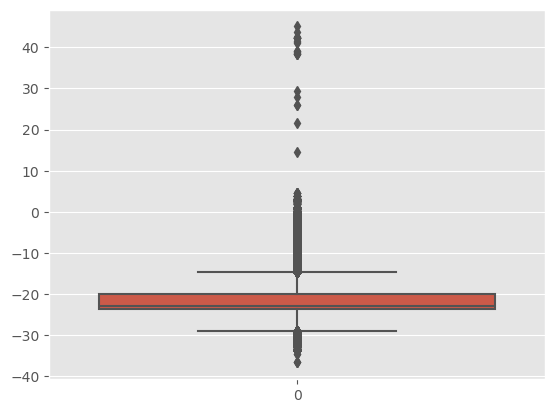

In [8]:
sns.boxplot(df_geo['geolocation_lat']);

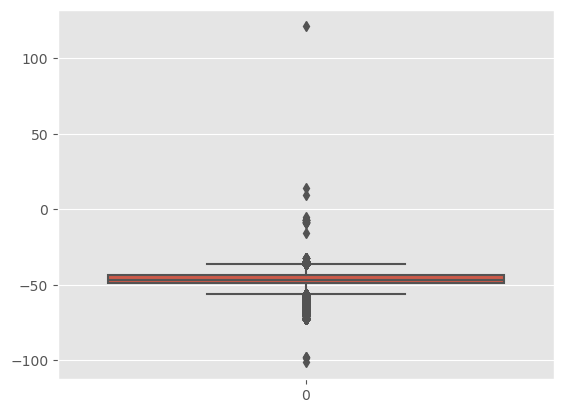

In [9]:
sns.boxplot(df_geo['geolocation_lng']);

In [10]:
# Removing outliers
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
df_geo = df_geo[df_geo.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
df_geo = df_geo[df_geo.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
df_geo = df_geo[df_geo.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
df_geo = df_geo[df_geo.geolocation_lng <=  -34.79314722]

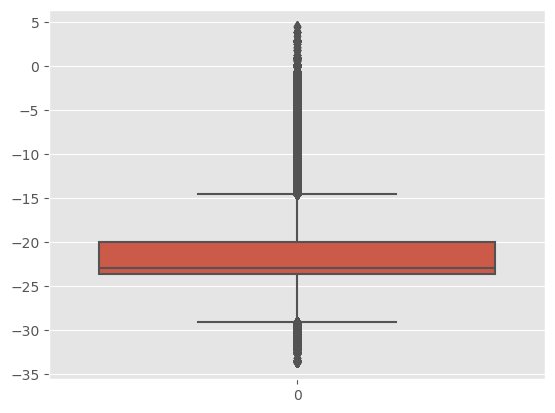

In [11]:
sns.boxplot(df_geo['geolocation_lat']);

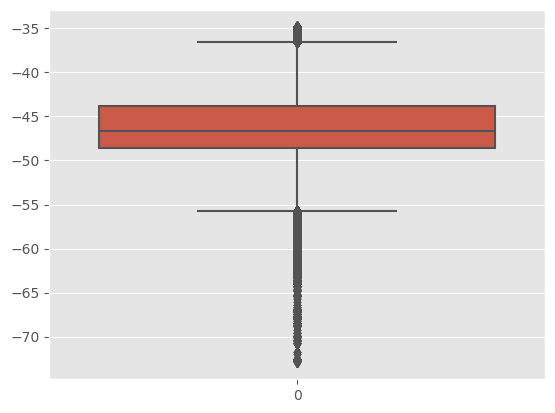

In [12]:
sns.boxplot(df_geo['geolocation_lng']);

In [13]:
from datashader.utils import lnglat_to_meters as webm
x, y = webm(df_geo.geolocation_lng, df_geo.geolocation_lat)
df_geo['x'] = pd.Series(x)
df_geo['y'] = pd.Series(y)

In [14]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                       01037       -23.545621       -46.639292   
1                       01046       -23.546081       -46.644820   
2                       01046       -23.546129       -46.642951   
3                       01041       -23.544392       -46.639499   
4                       01035       -23.541578       -46.641607   

  geolocation_city geolocation_state geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                    0   
1        sao paulo                SP                                    0   
2        sao paulo                SP                                    0   
3        sao paulo                SP                                    0   
4        sao paulo                SP                                    0   

  geolocation_zip_code_prefix_2_digits geolocation_zip_code_prefix_3_digits  \
0                                   01                                  010   
1                                   01                                  010   
2                                   01                                  010   
3                                   01                                  010   
4                                   01                                  010   

  geolocation_zip_code_prefix_4_digits             x             y  
0                                 0103 -5.191862e+06 -2.698137e+06  
1                                 0104 -5.192478e+06 -2.698193e+06  
2                                 0104 -5.192270e+06 -2.698199e+06  
3                                 0104 -5.191885e+06 -2.697988e+06  
4                                 0103 -5.192120e+06 -2.697646e+06

In [15]:
# transforming the prefixes to int for plotting purposes
df_geo['geolocation_zip_code_prefix'] = df_geo['geolocation_zip_code_prefix'].astype(int)
df_geo['geolocation_zip_code_prefix_1_digits'] = df_geo['geolocation_zip_code_prefix_1_digits'].astype(int)
df_geo['geolocation_zip_code_prefix_2_digits'] = df_geo['geolocation_zip_code_prefix_2_digits'].astype(int)
df_geo['geolocation_zip_code_prefix_3_digits'] = df_geo['geolocation_zip_code_prefix_3_digits'].astype(int)
df_geo['geolocation_zip_code_prefix_4_digits'] = df_geo['geolocation_zip_code_prefix_4_digits'].astype(int)

In [16]:
brazil = df_geo
agg_name = 'geolocation_zip_code_prefix'

In [17]:
df_geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  geolocation_zip_code_prefix_1_digits  \
0        sao paulo                SP                                     0   
1        sao paulo                SP                                     0   
2        sao paulo                SP                                     0   
3        sao paulo                SP                                     0   
4        sao paulo                SP                                     0   

   geolocation_zip_code_prefix_2_digits  geolocation_zip_code_prefix_3_digits  \
0                                     1                                    10   
1                                     1                                    10   
2                                     1                                    10   
3                                     1                                    10   
4                                     1                                    10   

   geolocation_zip_code_prefix_4_digits             x             y  
0                                   103 -5.191862e+06 -2.698137e+06  
1                                   104 -5.192478e+06 -2.698193e+06  
2                                   104 -5.192270e+06 -2.698199e+06  
3                                   104 -5.191885e+06 -2.697988e+06  
4                                   103 -5.192120e+06 -2.697646e+06

In [18]:
df_geo['geolocation_state'].value_counts()

geolocation_state
SP    404267
MG    126334
RJ    121164
RS     61847
PR     57856
SC     38328
BA     36041
GO     20139
ES     16746
PE     16421
DF     12986
MT     12030
CE     11674
PA     10846
MS     10431
MA      7853
PB      5537
RN      5041
PI      4549
AL      4182
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: count, dtype: int64

In [19]:
# check geolocation_city value
df_geo['geolocation_city'].value_counts()

geolocation_city
sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jundiá                       1
baía formosa                 1
herval doeste                1
cachoeira dos índios         1
araçagi                      1
Name: count, Length: 8006, dtype: int64

In [20]:
#focus on 5 highest value, replace the simillar name
df_geo['geolocation_city'] = df_geo['geolocation_city'].replace({'são paulo': 'sao paulo'})

In [21]:
df_geo['geolocation_city'].value_counts()

geolocation_city
sao paulo               160718
rio de janeiro           62151
belo horizonte           27805
curitiba                 16593
porto alegre             13521
                         ...  
jundiá                       1
baía formosa                 1
herval doeste                1
cachoeira dos índios         1
araçagi                      1
Name: count, Length: 8005, dtype: int64

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
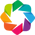

In [22]:
# plot wtih holoviews + datashader - bokeh with map background
import holoviews as hv
import geoviews as gv
import datashader as ds
from colorcet import fire, rainbow, bgy, bjy, bkr, kb, kr
from datashader.colors import colormap_select, Greys9
from holoviews.streams import RangeXY
from holoviews.operation.datashader import datashade, dynspread, rasterize
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
hv.extension('bokeh')

%opts Overlay [width=800 height=600 toolbar='above' xaxis=None yaxis=None]
%opts QuadMesh [tools=['hover'] colorbar=True] (alpha=0 hover_alpha=0.2)

T = 0.05
PX = 1

def plot_map(data, label, agg_data, agg_name, cmap):
    url="http://server.arcgisonline.com/ArcGIS/rest/services/Canvas/World_Dark_Gray_Base/MapServer/tile/{Z}/{Y}/{X}.png"
    geomap = gv.WMTS(url)
    points = hv.Points(gv.Dataset(data, kdims=['x', 'y'], vdims=[agg_name]))
    agg = datashade(points, element_type=gv.Image, aggregator=agg_data, cmap=cmap)
    zip_codes = dynspread(agg, threshold=T, max_px=PX)
    hover = hv.util.Dynamic(rasterize(points, aggregator=agg_data, width=50, height=25, streams=[RangeXY]), operation=hv.QuadMesh)
    hover = hover.options(cmap=cmap)
    img = geomap * zip_codes * hover
    img = img.relabel(label)
    return img

In [23]:
plot_map(brazil, 'Zip Codes in Brazil', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [24]:
def filter_data(level, name):
    df = df_geo[df_geo[level] == name]
    #remove outliers
    df = df[(df.x <= df.x.quantile(0.999)) & (df.x >= df.x.quantile(0.001))]
    df = df[(df.y <= df.y.quantile(0.999)) & (df.y >= df.y.quantile(0.001))]
    return df

In [25]:
sp = filter_data('geolocation_state', 'SP')
agg_name = 'geolocation_zip_code_prefix'
sp[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                402651.000000
mean                   9030.831782
std                    5101.941134
min                    1001.000000
25%                    4661.000000
50%                    8257.000000
75%                   13330.000000
max                   19990.000000

In [26]:
plot_map(sp, 'Zip Codes in Sao Paulo State', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

In [27]:
saopaulo = filter_data('geolocation_city', 'sao paulo')
agg_name = 'geolocation_zip_code_prefix'
saopaulo[agg_name].describe().to_frame()

geolocation_zip_code_prefix
count                160074.000000
mean                   4131.251509
std                    1790.249371
min                    1001.000000
25%                    2957.000000
50%                    4173.000000
75%                    5145.000000
max                    9540.000000

In [28]:
plot_map(saopaulo, 'Zip Codes in Sao Paulo', ds.min(agg_name), agg_name, cmap=rainbow)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y geolocation_zip_code_prefix)

### Seller dataset

In [29]:
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [30]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

### Customer Dataset

In [31]:
customers = pd.read_csv('olist_customers_dataset.csv',dtype={'customer_zip_code_prefix': str})

In [32]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

  customer_zip_code_prefix          customer_city customer_state  
0                    14409                 franca             SP  
1                    09790  sao bernardo do campo             SP  
2                    01151              sao paulo             SP  
3                    08775        mogi das cruzes             SP  
4                    13056               campinas             SP

### Product Dataset

In [33]:
products = pd.read_csv('olist_products_dataset.csv')

In [34]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

### Order Dataset

In [35]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

### Order Review Dataset

In [36]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

### Order Payment Dataset

In [37]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

### Order Item Dataset

In [38]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

### Product Category Dataset

In [39]:
categories= pd.read_csv('product_category_name_translation.csv')
categories.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

### Where does revenue comes 

In [40]:
# getting the first 3 digits of customer zipcode
customers['customer_zip_code_prefix_3_digits'] = customers['customer_zip_code_prefix'].str[0:3]

In [41]:
customers['customer_zip_code_prefix_3_digits'] = customers['customer_zip_code_prefix_3_digits'].astype(int)

In [42]:
brazil_geo = df_geo.set_index('geolocation_zip_code_prefix_3_digits').copy()

In [43]:
brazil_geo.head(2)

geolocation_zip_code_prefix  \
geolocation_zip_code_prefix_3_digits                                
10                                                           1037   
10                                                           1046   

                                      geolocation_lat  geolocation_lng  \
geolocation_zip_code_prefix_3_digits                                     
10                                         -23.545621       -46.639292   
10                                         -23.546081       -46.644820   

                                     geolocation_city geolocation_state  \
geolocation_zip_code_prefix_3_digits                                      
10                                          sao paulo                SP   
10                                          sao paulo                SP   

                                      geolocation_zip_code_prefix_1_digits  \
geolocation_zip_code_prefix_3_digits                                         
10                                                                       0   
10                                                                       0   

                                      geolocation_zip_code_prefix_2_digits  \
geolocation_zip_code_prefix_3_digits                                         
10                                                                       1   
10                                                                       1   

                                      geolocation_zip_code_prefix_4_digits  \
geolocation_zip_code_prefix_3_digits                                         
10                                                                     103   
10                                                                     104   

                                                 x             y  
geolocation_zip_code_prefix_3_digits                              
10                                   -5.191862e+06 -2.698137e+06  
10                                   -5.192478e+06 -2.698193e+06

In [44]:
# merging the data
df_orders = orders.merge(order_items, on='order_id')
df_orders = df_orders.merge(customers, on='customer_id')
df_orders = df_orders.merge(order_reviews, on='order_id')

In [45]:
gp = df_orders.groupby('customer_zip_code_prefix_3_digits')['price'].sum().to_frame()
revenue = brazil_geo.join(gp)
agg_name = 'revenue'
revenue[agg_name] = revenue.price / 1000

In [46]:
revenue.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
10                         1037       -23.545621       -46.639292   
10                         1046       -23.546081       -46.644820   
10                         1046       -23.546129       -46.642951   
10                         1041       -23.544392       -46.639499   
10                         1035       -23.541578       -46.641607   

   geolocation_city geolocation_state  geolocation_zip_code_prefix_1_digits  \
10        sao paulo                SP                                     0   
10        sao paulo                SP                                     0   
10        sao paulo                SP                                     0   
10        sao paulo                SP                                     0   
10        sao paulo                SP                                     0   

    geolocation_zip_code_prefix_2_digits  \
10                                     1   
10                                     1   
10                                     1   
10                                     1   
10                                     1   

    geolocation_zip_code_prefix_4_digits             x             y  \
10                                   103 -5.191862e+06 -2.698137e+06   
10                                   104 -5.192478e+06 -2.698193e+06   
10                                   104 -5.192270e+06 -2.698199e+06   
10                                   104 -5.191885e+06 -2.697988e+06   
10                                   103 -5.192120e+06 -2.697646e+06   

       price   revenue  
10  24073.51  24.07351  
10  24073.51  24.07351  
10  24073.51  24.07351  
10  24073.51  24.07351  
10  24073.51  24.07351

In [47]:
plot_map(revenue, 'Orders Revenue (thousands R$)', ds.mean(agg_name), agg_name, cmap=fire)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y revenue)

#### Delivery time

In [48]:
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders.order_delivered_customer_date)
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders.order_estimated_delivery_date)
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders.order_delivered_carrier_date)
df_orders['actual_delivery_time'] = df_orders.order_delivered_customer_date - df_orders.order_delivered_carrier_date
df_orders['actual_delivery_time'] = df_orders['actual_delivery_time'].dt.days

In [49]:
gp = df_orders.groupby('customer_zip_code_prefix_3_digits')['actual_delivery_time'].mean().to_frame()
delivery_time = brazil_geo.join(gp)
agg_name = 'avg_delivery_time'
delivery_time[agg_name] = delivery_time['actual_delivery_time']

In [50]:
gp.head()

actual_delivery_time
customer_zip_code_prefix_3_digits                      
10                                             3.041176
11                                             4.019481
12                                             4.103297
13                                             4.082011
14                                             3.489607

In [51]:
plot_map(delivery_time, 'Orders Average Delivery Time (days)', ds.mean(agg_name), agg_name, cmap=bjy)

:DynamicMap   []
   :Overlay
      .WMTS.I     :WMTS   [Longitude,Latitude]
      .RGB.I      :RGB   [x,y]   (R,G,B,A)
      .QuadMesh.I :QuadMesh   [x,y]   (x_y avg_delivery_time)

#### Total revenue

In [52]:
# Filter the data for delivered orders
delivered_orders = df_orders[df_orders['order_status'] == 'delivered']

# Calculate total revenue
total_revenue = delivered_orders['price'].sum()

print(f"The total revenue from delivered orders is: {total_revenue}")

The total revenue from delivered orders is: 13281098.170000002


#### Category of products that are most purchased and least popular?

In [53]:
# Group by product category and count the number of orders
orders_categories = order_items.merge(products, on='product_id').merge(categories, on='product_category_name')
category_counts = orders_categories.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Select the top 5 and bottom 5 categories
top_5 = category_counts.head(5)
bottom_5 = category_counts.tail(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3952\2255974160.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_5.index, rotation=45)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3952\2255974160.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bottom_5.index, rotation=45)


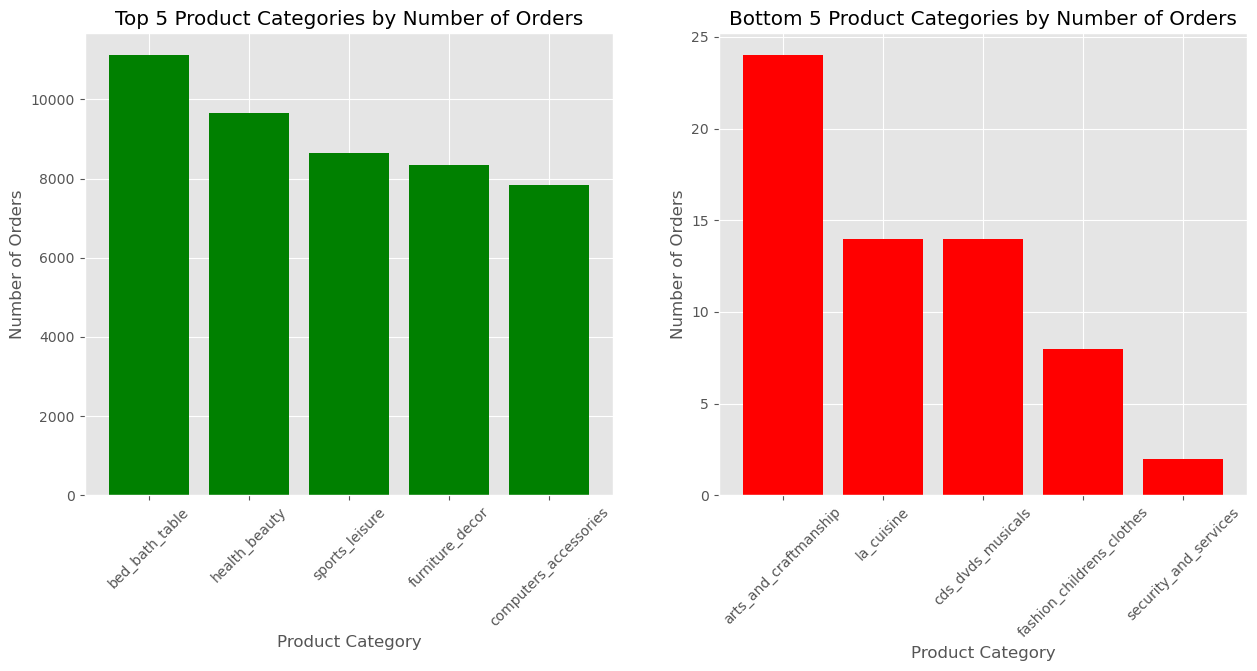

In [54]:
#Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Plot the top 5 categories on the left subplot
ax1.bar(top_5.index, top_5.values, color='green')
ax1.set_xticklabels(top_5.index, rotation=45)
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Number of Orders')
ax1.set_title('Top 5 Product Categories by Number of Orders')

# Plot the bottom 5 categories on the right subplot
ax2.bar(bottom_5.index, bottom_5.values, color='red')
ax2.set_xticklabels(bottom_5.index, rotation=45)
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Number of Orders')
ax2.set_title('Bottom 5 Product Categories by Number of Orders')

# Show the figure
plt.show()

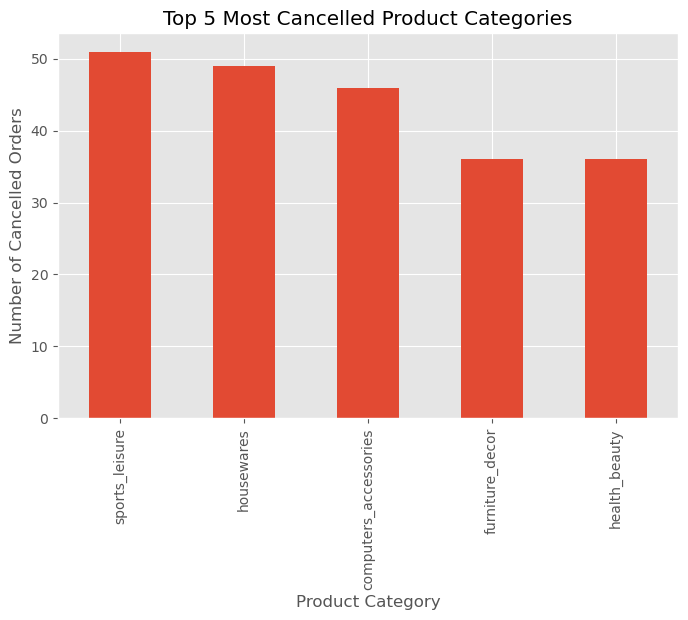

In [55]:
# Merge the DataFrames on their respective keys
merged_df = pd.merge(orders, order_items, on='order_id')
merged_df = pd.merge(merged_df, products, on='product_id')
merged_df = pd.merge(merged_df, categories, on='product_category_name')

# Filter the data for cancelled orders
cancelled_orders = merged_df[merged_df['order_status'] == 'canceled']

# Find the 5 most cancelled product categories
most_cancelled_categories = cancelled_orders['product_category_name_english'].value_counts().nlargest(5)

# Create a bar plot
plt.figure(figsize=(8, 5))
most_cancelled_categories.plot(kind='bar')
plt.title('Top 5 Most Cancelled Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Cancelled Orders')
plt.show()

#### Yearly Sales

In [56]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders = orders.dropna(subset=['order_purchase_timestamp'])
orders['order_purchase_timestamp'].dtype

dtype('<M8[ns]')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3952\3422136168.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_orders['year'] = delivered_orders['order_purchase_timestamp'].dt.year
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seabo

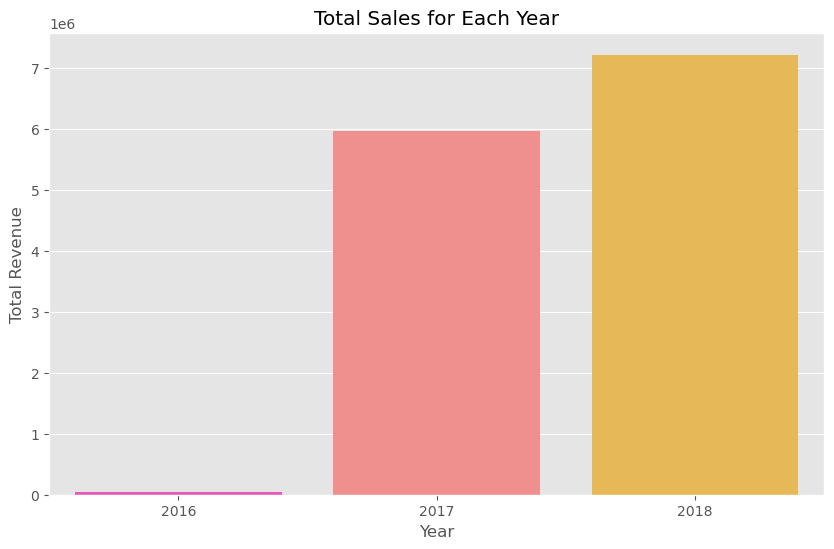

In [57]:
# Merge the DataFrames on 'order_id'
merged_df = pd.merge(orders, order_items, on='order_id')

# Filter the data for delivered orders
delivered_orders = merged_df[merged_df['order_status'] == 'delivered']

# Extract the year from 'order_purchase_timestamp'
delivered_orders['year'] = delivered_orders['order_purchase_timestamp'].dt.year

# Calculate total revenue for each year
yearly_revenue = delivered_orders.groupby('year')['price'].sum()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_revenue.index, y=yearly_revenue.values, palette='spring')
plt.title('Total Sales for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

In [58]:
# Group by payment type and count the number of unique orders and sum the payment value for each type
payment_stats = order_payments.groupby('payment_type')['order_id'].nunique().rename('frequency')
payment_stats = payment_stats.to_frame().join(order_payments.groupby('payment_type')['payment_value'].sum())

# Sort the payment stats by frequency and payment value in descending order
payment_stats = payment_stats.sort_values(by=['frequency', 'payment_value'], ascending=False)

# Calculate the frequency percentage for each payment type
payment_stats['frequency_percentage'] = payment_stats['frequency'] / payment_stats['frequency'].sum() * 100

# Convert the payment value to million unit
payment_stats['payment_value_million'] = payment_stats['payment_value'] / 1000000

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


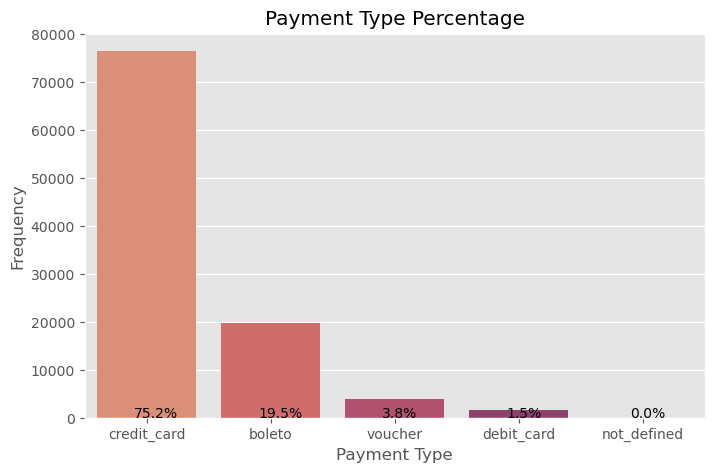

In [59]:
# Plot a bar chart to show the payment frequency and percentage by payment type
plt.figure(figsize=(8,5))
sns.barplot(data=payment_stats, x=payment_stats.index, y='frequency', palette='flare')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.title('Payment Type Percentage')
for i, v in enumerate(payment_stats['frequency_percentage']):
    plt.text(i - 0.1, v + 10, f'{v:.1f}%', color='black')
plt.show()